In [24]:
import numpy as np
import matplotlib.pyplot as plt
import os, glob, re, json
import pandas as pd
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm, SymLogNorm, CenteredNorm
# from censai import PowerSpectrum
from censai import PhysicalModelv2
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from argparse import Namespace
import math, json
import matplotlib.pylab as pylab
import h5py
from matplotlib.ticker import FuncFormatter
from tqdm import tqdm
from glob import glob

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 2000)
pd.set_option('display.max_colwidth', 200)

result_dir = os.path.join(os.getenv("CENSAI_PATH"), "results")
data_path = os.path.join(os.getenv("CENSAI_PATH"), "data")
models_path = os.path.join(os.getenv("CENSAI_PATH"), "models")
plt.style.use("science")
params = {'legend.fontsize': 27,
          'figure.figsize': (10, 10),
         'axes.labelsize': 27,
         'axes.titlesize': 30,#'x-large',
         'xtick.labelsize':20,
         'ytick.labelsize':20,
         'figure.titlesize': 40
         }
pylab.rcParams.update(params)


In [25]:
phys = PhysicalModelv2(pixels=128, image_fov=7.68, kappa_fov=7.68, method="fft")

In [28]:
path = os.getenv('CENSAI_PATH') + "results/" 
# hf = [h5py.File(f, 'r') for f in glob(path + "RIMSU128hstv4_augmented_003_K3_L5_BCL2_211124140837_continue_lr6e-05_211129202839_RIMSource128hstv3_control_009_A1_L3_FLM0.0_211108220845_0*.h5")]
hf = h5py.File(path + "RIMSU128hstv4_augmented_003_K3_L5_BCL2_211124140837_continue_lr6e-05_211129202839_RIMSource128hstv3_control_009_A1_L3_FLM0.0_211108220845_02.h5", 'r')
B = 50 # example per files|

OSError: Unable to open file (bad object header version number)

In [11]:
dataset = "lenses128hst_TNG_rau_200k_control_denoised_testset_validated"
hf[0][dataset].keys()

<KeysViewHDF5 ['chi_squared', 'chi_squared2', 'chi_squared_reoptimized', 'kappa', 'kappa_coherence_spectrum', 'kappa_coherence_spectrum_reoptimized', 'kappa_fov', 'kappa_frequencies', 'kappa_optim_mse', 'kappa_pred', 'kappa_pred_reoptimized', 'lens', 'lens_coherence_spectrum', 'lens_coherence_spectrum2', 'lens_coherence_spectrum_repotimized', 'lens_fov', 'lens_frequencies', 'lens_pred', 'lens_pred2', 'lens_pred_reoptimized', 'noise_rms', 'psf', 'psf_fwhm', 'source', 'source_coherence_spectrum', 'source_coherence_spectrum2', 'source_coherence_spectrum_reoptimized', 'source_fov', 'source_frequencies', 'source_optim_mse', 'source_pred', 'source_pred2', 'source_pred_reoptimized']>

In [12]:
c = []
cb = []
for i in range(len(hf)):
    c.append(hf[i][dataset]["chi_squared_reoptimized"][0, -1])
    cb.append(hf[i][dataset]["chi_squared"][0, -1])

In [13]:
cb

[1.1147588,
 93.77292,
 16.611397,
 6.498912,
 1.4994694,
 3.2918487,
 1.4101446,
 1.3667614,
 1.5758038]

In [14]:
c

[0.9985606,
 9.965858,
 4.422657,
 1.0661421,
 1.0413978,
 1.1070117,
 1.0143497,
 1.0965145,
 1.0334142]

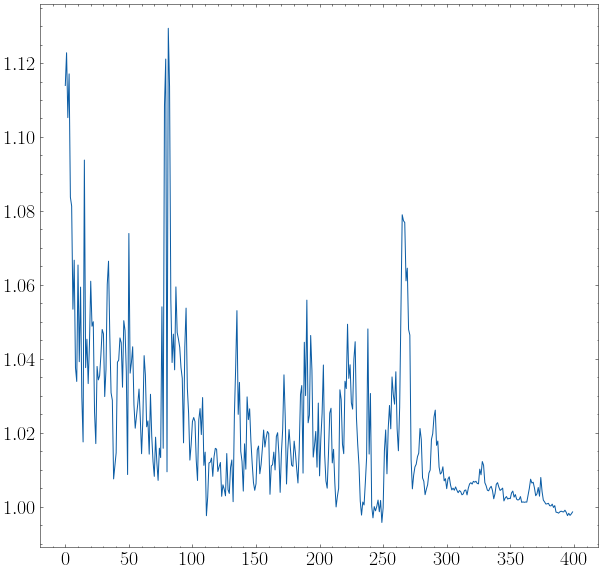

In [23]:
plt.plot(hf[0][dataset]["chi_squared_reoptimized"][0, :])
# plt.yscale("log")

# Test set

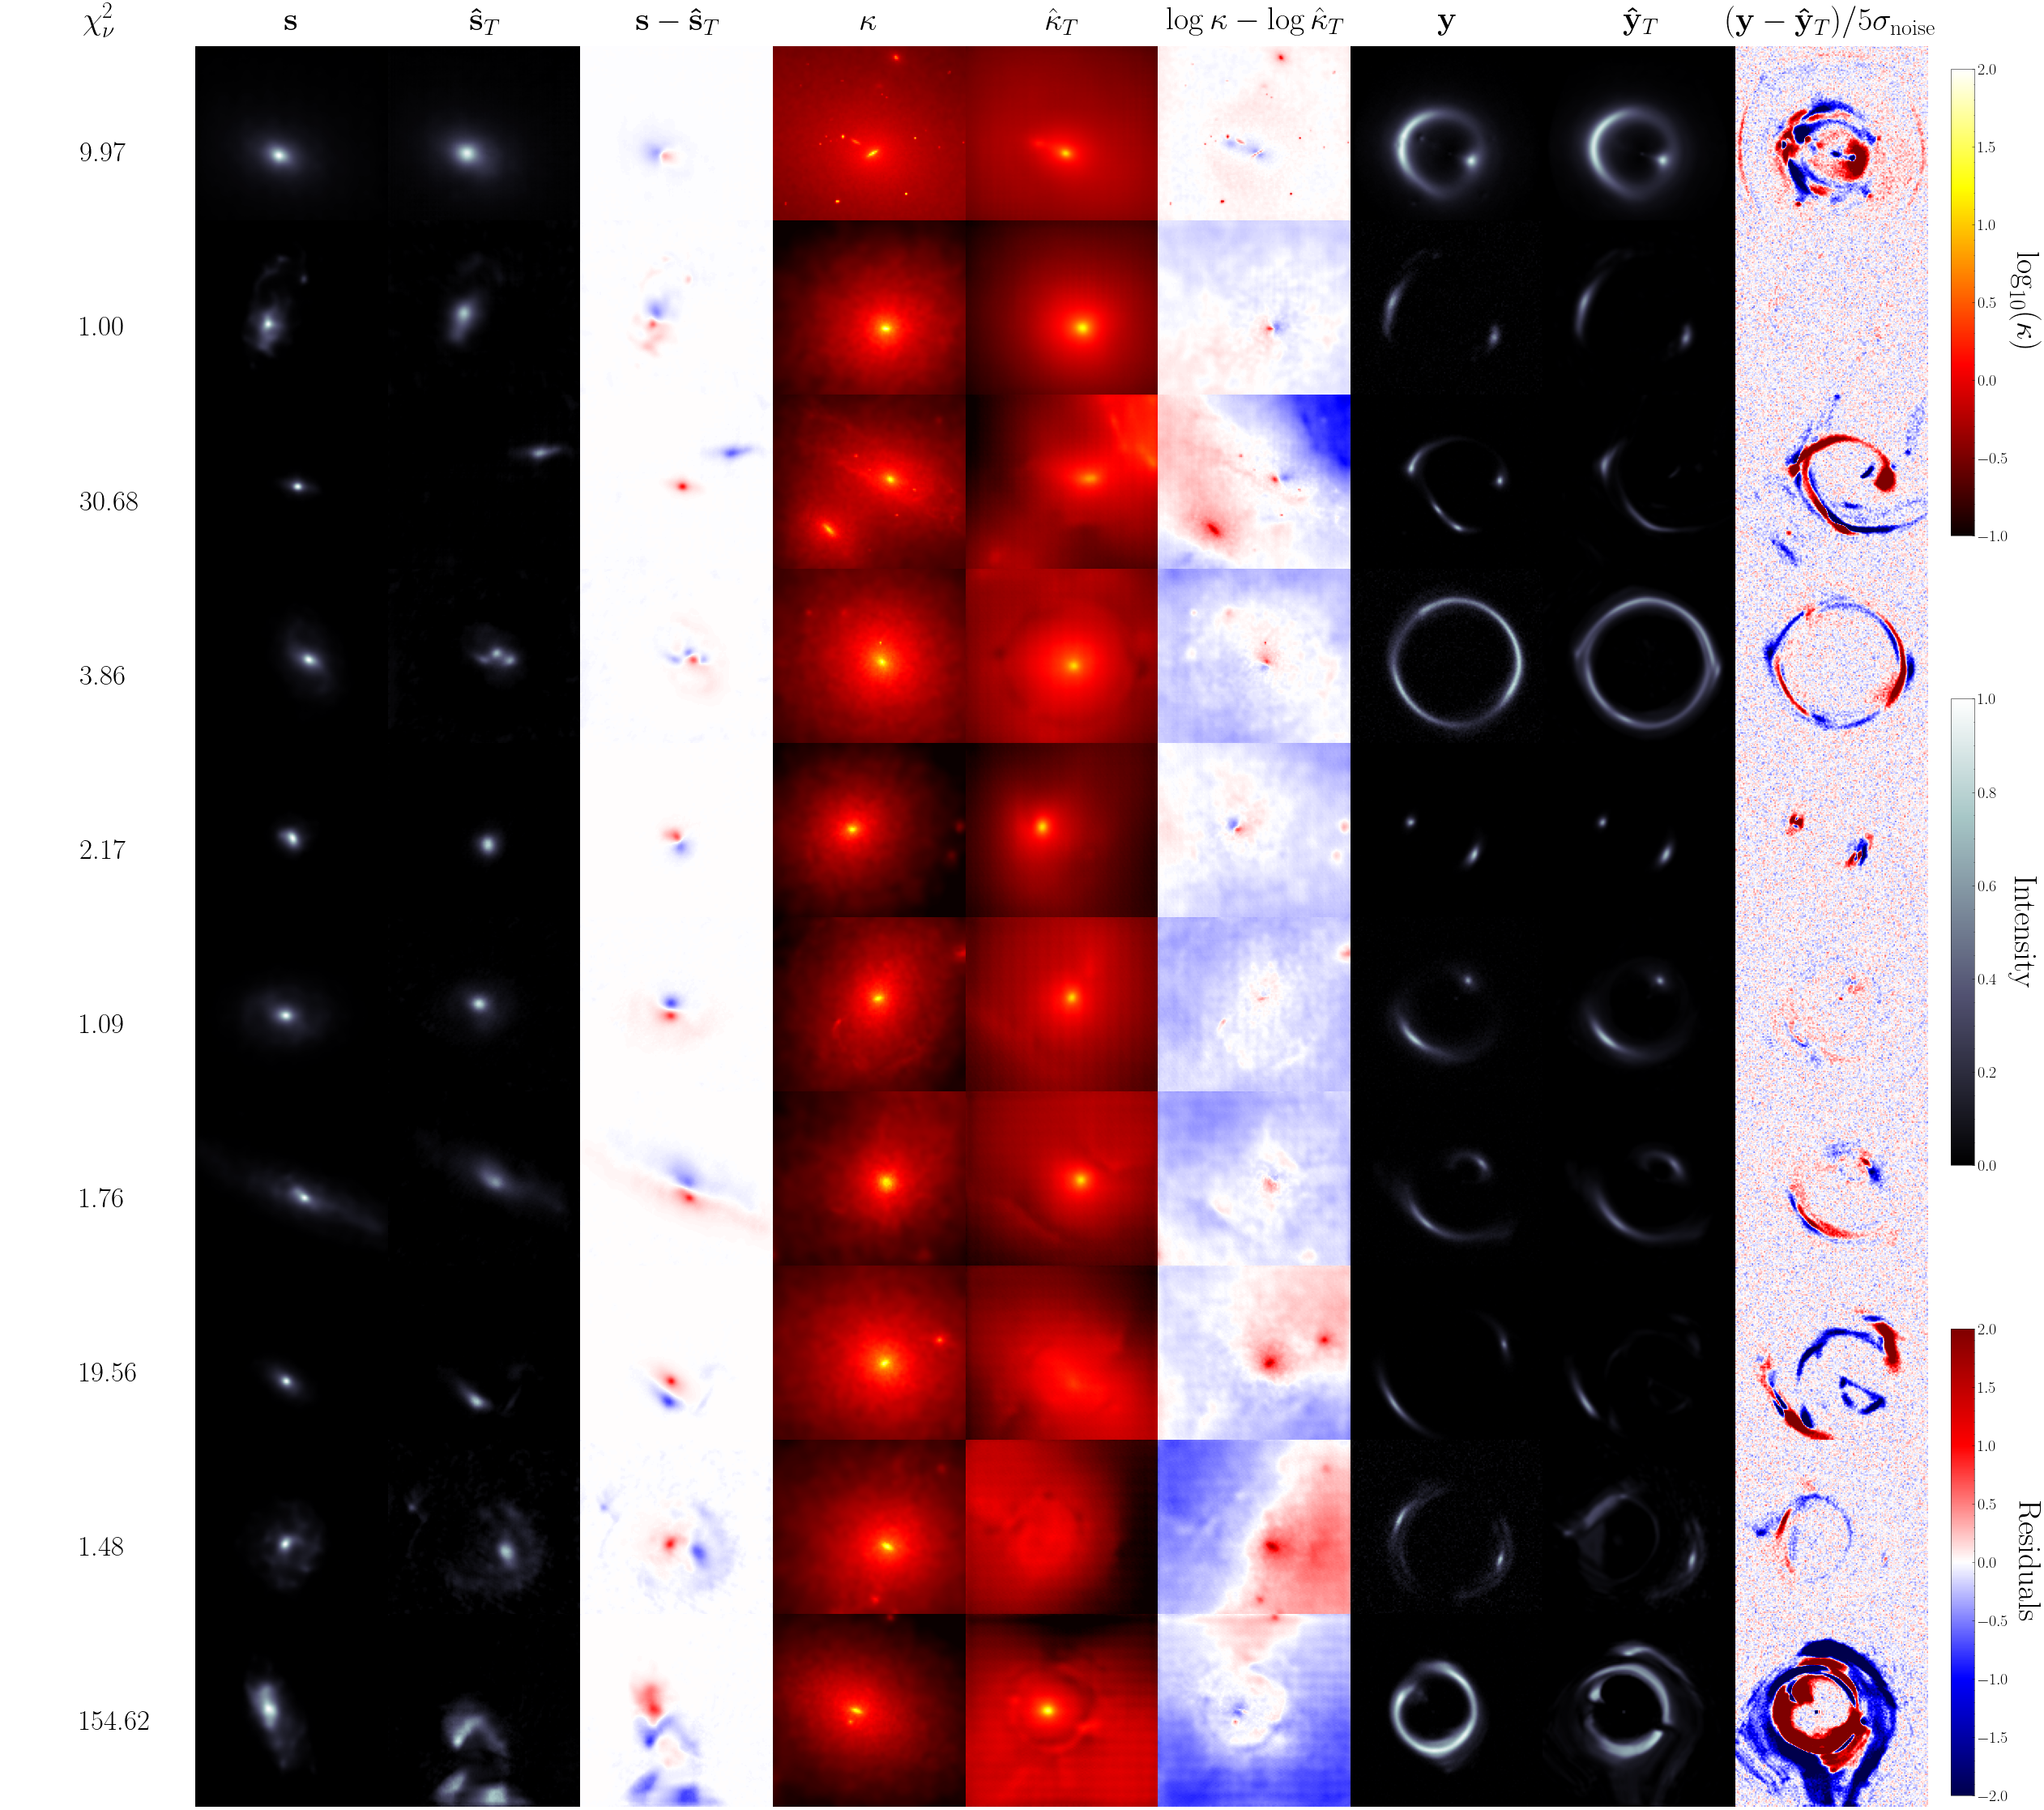

In [20]:
N = 10
# For RIMSource A0 set
# start = 0 # representative sample 3
# start = 80 # represnetative sample 1
# start = 190  # representative sample 2
start = 50



fig, axs = plt.subplots(N, 10, figsize=(40, 4 * N))

for i in range(N):
    k = (i + start) % B
    b = (i + start) // B
    lens = hf[b][dataset][f"lens"][k].squeeze()
    source = hf[b][dataset][f"source"][k].squeeze()
    kappa = hf[b][dataset][f"kappa"][k].squeeze()
#     lens_pred = hf[b][dataset][f"lens_pred"][k].squeeze()
    lens_pred = hf[b][dataset][f"lens_pred_reoptimized"][k][-1].squeeze()
    source_pred = hf[b][dataset][f"source_pred_reoptimized"][k][-1].squeeze()
#     kappa_pred = hf[b][dataset][f"kappa_pred"][k][-1].squeeze()
    kappa_pred = hf[b][dataset][f"kappa_pred_reoptimized"][k][-1].squeeze()
    chi_squared = hf[b][dataset]["chi_squared_reoptimized"][k][-1]
    noise_rms = hf[b][dataset]["noise_rms"][k]

    axs[i, 1].imshow(source, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 2].imshow(source_pred, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 3].imshow(source - source_pred, cmap="seismic",vmin=-2, vmax=2, origin="lower")
    
    axs[i, 4].imshow(kappa, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
    axs[i, 5].imshow(kappa_pred, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
    axs[i, 6].imshow(np.log10(kappa) - np.log10(kappa_pred), cmap="seismic", vmin=-2, vmax=2, origin="lower")
    
    axs[i, 7].imshow(lens, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 8].imshow(lens_pred, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 9].imshow((lens - lens_pred)/noise_rms/5, cmap="seismic", vmin=-2, vmax=2, origin="lower")
    
    axs[i, 0].annotate(f"{chi_squared:.2f}", xy=(0.4, 0.4), xycoords="axes fraction", size=35)

    
for i in range(N):            
    for j in range(10):
        axs[i, j].axis("off")

fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.67, 0.01, 0.2])
fig.colorbar(ScalarMappable(cmap="hot", norm=Normalize(vmin=-1, vmax=2)), cax=cbar_ax)
cbar_ax.set_ylabel(r"$\log_{10}(\kappa)$", rotation=270, labelpad=40, fontsize=40)
cbar_ax.yaxis.set_label_position("right")


fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.33 + .07, 0.01, 0.2])
fig.colorbar(ScalarMappable(cmap="bone", norm=Normalize(vmin=0, vmax=1)), cax=cbar_ax)
cbar_ax.set_ylabel(r"Intensity", rotation=270, labelpad=50, fontsize=40)
cbar_ax.yaxis.set_label_position("right")

fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.13, 0.01, 0.2])
fig.colorbar(ScalarMappable(cmap="seismic", norm=Normalize(vmin=-2, vmax=2)), cax=cbar_ax)
cbar_ax.set_ylabel(r"Residuals", rotation=270, labelpad=40, fontsize=40)
cbar_ax.yaxis.set_label_position("right")

# axs[0, 0].set_title("Source")
# axs[0, 1].set_title("Source prédite")
# axs[0, 2].set_title("Différence")
# axs[0, 3].set_title("$\kappa$")
# axs[0, 4].set_title("$\hat{\kappa}_T$")
# axs[0, 5].set_title("$\kappa - \hat{\kappa}_T$")
# axs[0, 6].set_title("Observation ($\mathbf{y}$)")
# axs[0, 7].set_title("Prédiction ($\mathbf{\hat{y}}_T$)")
# axs[0, 8].set_title("$\mathbf{y} - \mathbf{\hat{y}}_T$")
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig(f"../results/rim_pred{start:d}.png")

# fig.suptitle("Validation set")
axs[0, 0].set_title(r"$\chi^2_\nu$", pad=20, fontsize=40)
axs[0, 1].set_title(r"$\mathbf{s}$", pad=20, fontsize=40)
axs[0, 2].set_title(r"$\mathbf{\hat{s}}_T$", pad=20, fontsize=40)
axs[0, 3].set_title(r"$\mathbf{s} - \mathbf{\hat{s}}_T$", pad=20, fontsize=40)
axs[0, 4].set_title("$\kappa$", pad=20, fontsize=40)
axs[0, 5].set_title("$\hat{\kappa}_T$", pad=20, fontsize=40)
axs[0, 6].set_title("$\log\kappa - \log\hat{\kappa}_T$", pad=20, fontsize=40)
axs[0, 7].set_title("$\mathbf{y}$", pad=20, fontsize=40)
axs[0, 8].set_title("$\mathbf{\hat{y}}_T$", pad=20, fontsize=40)
axs[0, 9].set_title("$(\mathbf{y} - \mathbf{\hat{y}}_T)/5\sigma_{\mathrm{noise}}$", pad=20, fontsize=40)
plt.subplots_adjust(wspace=0, hspace=-0.1)
# plt.savefig("tests_rimsu128hstv4_representative_sample1.png")
# plt.savefig("tests_rimsu128hstv4_representative_sample2.png")
# plt.savefig("tests_rimsu128hstv4_representative_sample3.png")

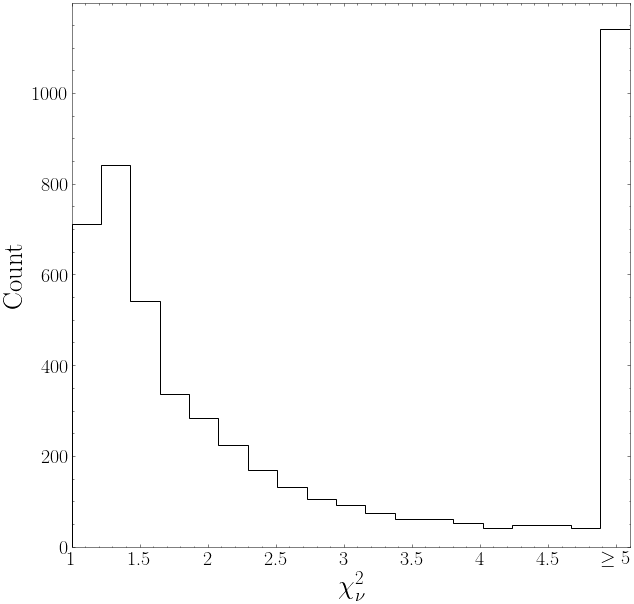

In [31]:
chi_squared = np.array(hf[dataset]["chi_squared"])*2
chi_

noise_rms = np.array(hf[dataset]["noise_rms"])
bins = np.linspace(1, 5.1, 20)
# bins = np.concatenate([bins, [1000]])
plt.hist(np.minimum(chi_squared[:, -1], 5.1), bins=bins, histtype="step", color="k", label="RIM");
# plt.hist(chi_squared[:, -1], bins=bins, histtype="step", color="k");
x = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
labels = ["1", "1.5", "2", "2.5", "3", "3.5", "4", "4.5", r"$\geq 5$"]
plt.xticks(x, labels)
# plt.title("Quality of Fit Distribution")
plt.xlim(1, 5.1)
plt.ylabel("Count")
plt.xlabel(r"$\chi^2_\nu$")
plt.savefig("chi_squared_distribution")

In [ ]:
# plt.hist(noise_rms, bins=100);

In [59]:
chi_squared = np.array(hf[dataset]["chi_squared"])*2
noise_rms = np.array(hf[dataset]["noise_rms"])
# indices = np.where(noise_rms > 0.03)[0]
# indices = np.where(chi_squared[:, -1] < 1.05)[0]
# indices = np.where((chi_squared[:, -1] > 1.1) & (chi_squared[:, -1] < 1.3))[0]
indices = np.where((chi_squared[:, -1] > 400))[0]

indices

array([ 164,  346,  497,  972, 1038, 1328, 2231, 2522, 3472, 3551, 3580,
       3916, 4129, 4386, 4505, 4719])

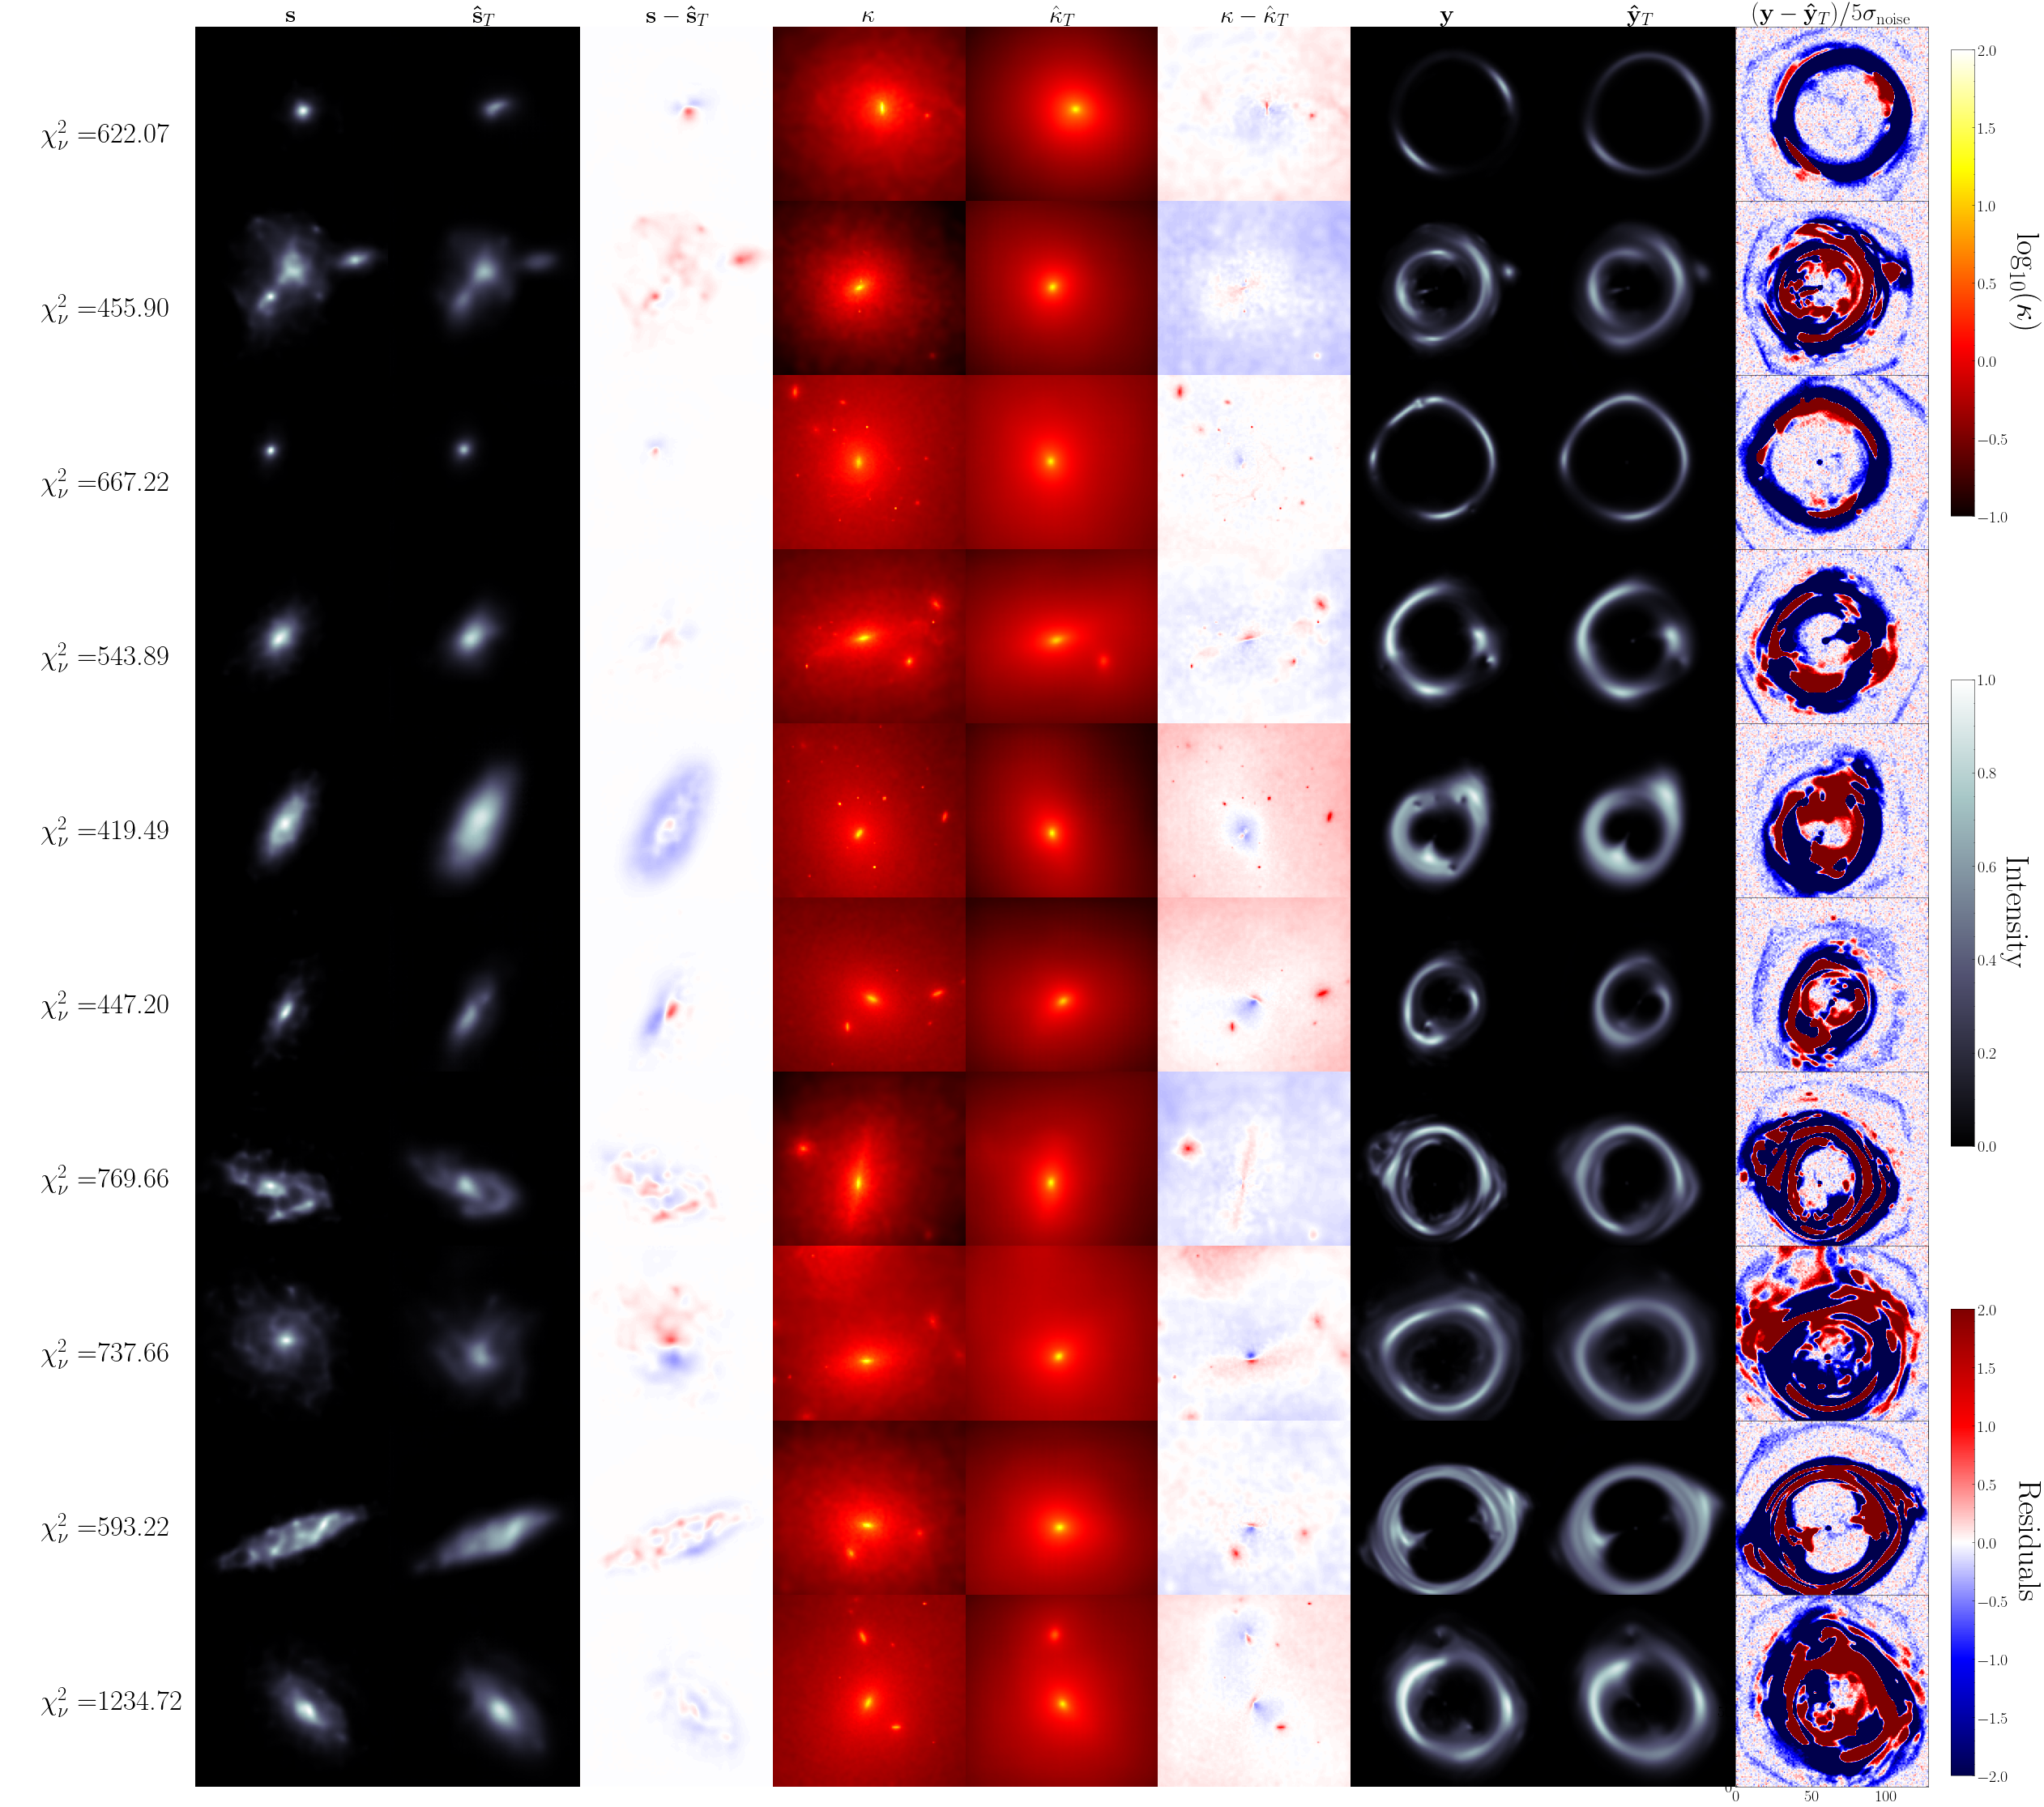

In [61]:
fig, axs = plt.subplots(N, 10, figsize=(40, 4 * N))
start = 0

for i in range(N):
    k = indices[i + start]
    lens = hf[dataset][f"lens"][k].squeeze()
    source = hf[dataset][f"source"][k].squeeze()
    kappa = hf[dataset][f"kappa"][k].squeeze()
    lens_pred = hf[dataset][f"lens_pred"][k].squeeze()
    source_pred = hf[dataset][f"source_pred"][k][-1].squeeze()
    kappa_pred = hf[dataset][f"kappa_pred"][k][-1].squeeze()
    chi_squared = hf[dataset]["chi_squared"][k][-1] * 2
    noise_rms = hf[dataset]["noise_rms"][k]

    axs[i, 1].imshow(source, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 2].imshow(source_pred, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 3].imshow(source - source_pred, cmap="seismic", vmin=-2, vmax=2, origin="lower")
    
    axs[i, 4].imshow(kappa, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
    axs[i, 5].imshow(kappa_pred, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
    axs[i, 6].imshow(np.log10(kappa) - np.log10(kappa_pred), cmap="seismic", vmin=-2, vmax=2, origin="lower")
    
    axs[i, 7].imshow(lens, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 8].imshow(lens_pred, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[i, 9].imshow((lens - lens_pred)/noise_rms/5, cmap="seismic", vmin=-2, vmax=2, origin="lower")
    
    axs[i, 0].annotate(fr"$\chi^2_\nu = ${chi_squared:.2f}", xy=(0.2, 0.4), xycoords="axes fraction", size=35)

    
for i in range(N):            
    for j in range(9):
        axs[i, j].axis("off")

fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.67, 0.01, 0.2])
fig.colorbar(ScalarMappable(cmap="hot", norm=Normalize(vmin=-1, vmax=2)), cax=cbar_ax)
cbar_ax.set_ylabel(r"$\log_{10}(\kappa)$", rotation=270, labelpad=40, fontsize=40)
cbar_ax.yaxis.set_label_position("right")


fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.33 + .07, 0.01, 0.2])
fig.colorbar(ScalarMappable(cmap="bone", norm=Normalize(vmin=0, vmax=1)), cax=cbar_ax)
cbar_ax.set_ylabel(r"Intensity", rotation=270, labelpad=40, fontsize=40)
cbar_ax.yaxis.set_label_position("right")

fig.subplots_adjust(right=0.95)
cbar_ax = fig.add_axes([0.96, 0.13, 0.01, 0.2])
fig.colorbar(ScalarMappable(cmap="seismic", norm=Normalize(vmin=-2, vmax=2)), cax=cbar_ax)
cbar_ax.set_ylabel(r"Residuals", rotation=270, labelpad=40, fontsize=40)
cbar_ax.yaxis.set_label_position("right")

# axs[0, 0].set_title("Source")
# axs[0, 1].set_title("Source prédite")
# axs[0, 2].set_title("Différence")
# axs[0, 3].set_title("$\kappa$")
# axs[0, 4].set_title("$\hat{\kappa}_T$")
# axs[0, 5].set_title("$\kappa - \hat{\kappa}_T$")
# axs[0, 6].set_title("Observation ($\mathbf{y}$)")
# axs[0, 7].set_title("Prédiction ($\mathbf{\hat{y}}_T$)")
# axs[0, 8].set_title("$\mathbf{y} - \mathbf{\hat{y}}_T$")
# plt.subplots_adjust(wspace=0, hspace=0)
# plt.savefig(f"../results/rim_pred{start:d}.png")

# fig.suptitle("Validation set")
axs[0, 1].set_title(r"$\mathbf{s}$")
axs[0, 2].set_title(r"$\mathbf{\hat{s}}_T$")
axs[0, 3].set_title(r"$\mathbf{s} - \mathbf{\hat{s}}_T$")
axs[0, 4].set_title("$\kappa$")
axs[0, 5].set_title("$\hat{\kappa}_T$")
axs[0, 6].set_title("$\kappa - \hat{\kappa}_T$")
axs[0, 7].set_title("$\mathbf{y}$")
axs[0, 8].set_title("$\mathbf{\hat{y}}_T$")
axs[0, 9].set_title("$(\mathbf{y} - \mathbf{\hat{y}}_T)/5\sigma_{\mathrm{noise}}$")
plt.subplots_adjust(wspace=0, hspace=-0.1)
plt.savefig("testset_worstcase.png")

100%|██████████| 8/8 [00:20<00:00,  2.60s/it]


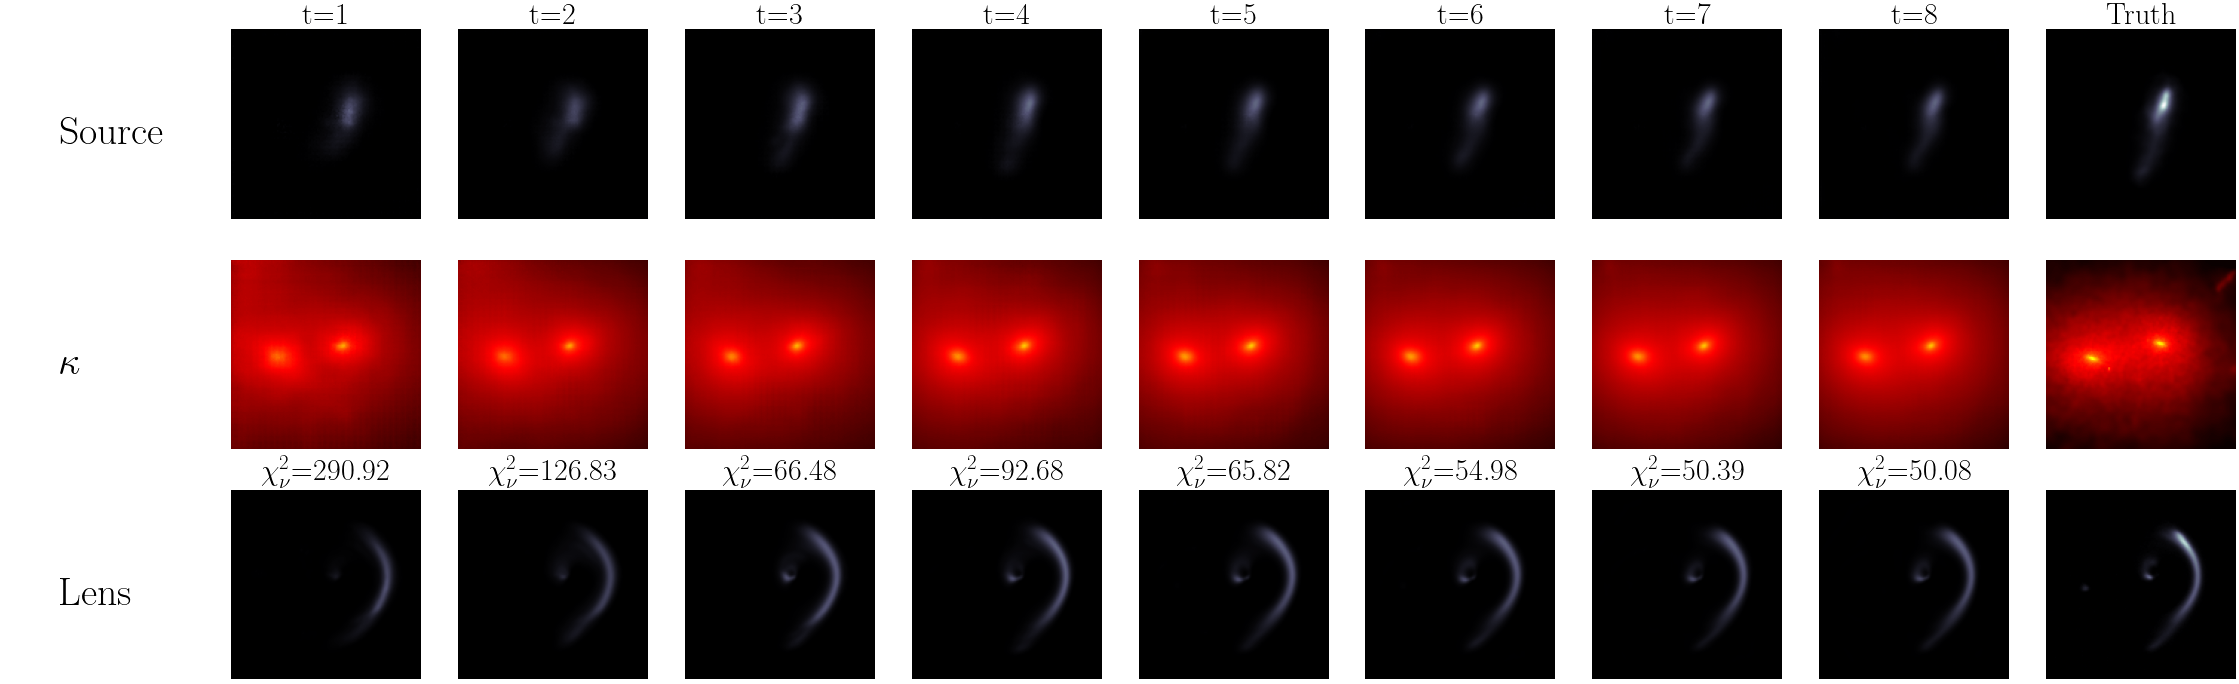

In [18]:
# k = 120 # interesting, but only a single kappa blob
# k = 125 # bad fit, might be interesting
k = 501 # two kappa blob, very interesting

fig, axs = plt.subplots(3, 10, figsize=(40, 12))
lens = hf[dataset][f"lens"][k].squeeze()
source = hf[dataset][f"source"][k].squeeze()
kappa = hf[dataset][f"kappa"][k].squeeze()
lens_pred = hf[dataset][f"lens_pred"][k].squeeze()
source_pred = hf[dataset][f"source_pred"][k][-1].squeeze()
kappa_pred = hf[dataset][f"kappa_pred"][k][-1].squeeze()
chi_squared = hf[dataset]["chi_squared"][k][-1] * 2
psf = hf["dataset"]["k"].squeeze()
noise_rms = hf[dataset]["noise_rms"][k]

axs[0, 0].annotate("Source", xy=(0.3, 0.4), xycoords="axes fraction", fontsize=40)
axs[0, 0].axis("off")
axs[1, 0].annotate(r"$\kappa$", xy=(0.3, 0.4), xycoords="axes fraction", fontsize=40)
axs[1, 0].axis("off")
axs[2, 0].annotate("Lens", xy=(0.3, 0.4), xycoords="axes fraction", fontsize=40)
axs[2, 0].axis("off")
for i in tqdm(range(1, 9)):
    lens = phys.forward(source_pred[i-1][None, ..., None], kappa_pred[i-1][None, ..., None], psf[None, ..., None])[0, ..., 0]
    axs[0, i].imshow(source_pred[i-1], cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[0, i].axis("off")
    axs[0, i].set_title(f"t={i}")
    axs[1, i].imshow(kappa_pred[i-1], cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
    axs[1, i].axis("off")
    axs[2, i].set_title(fr"$\chi^2_\nu$={chi_squared[i-1]:.2f}", pad=10)
    axs[2, i].imshow(lens, cmap="bone", vmin=0, vmax=1, origin="lower")
    axs[2, i].axis("off")
    
# fig.suptitle("Validation set")
axs[0, -1].imshow(source, cmap="bone", vmin=0, vmax=1, origin="lower")
axs[0, -1].axis("off")
axs[0, -1].set_title(f"Truth")
axs[1, -1].imshow(kappa, cmap="hot", norm=LogNorm(vmin=1e-1, vmax=100), origin="lower")
axs[1, -1].axis("off")
axs[2, -1].imshow(true_lens, cmap="bone", vmin=0, vmax=1, origin="lower")
axs[2, -1].axis("off")
plt.savefig(f"RIMSU128hstv4_optim_example_{k}.png")

In [85]:
((source_pred - source)**2).mean(axis=(1, 2))

array([0.00070318, 0.00065931, 0.00073074, 0.00081619, 0.00088637,
       0.00094533, 0.00098925, 0.00102202], dtype=float32)

In [86]:
((kappa_pred - kappa)**2).mean(axis=(1, 2))

array([0.12869336, 0.12094872, 0.12233438, 0.12467327, 0.12583284,
       0.1268778 , 0.12755385, 0.12803097], dtype=float32)

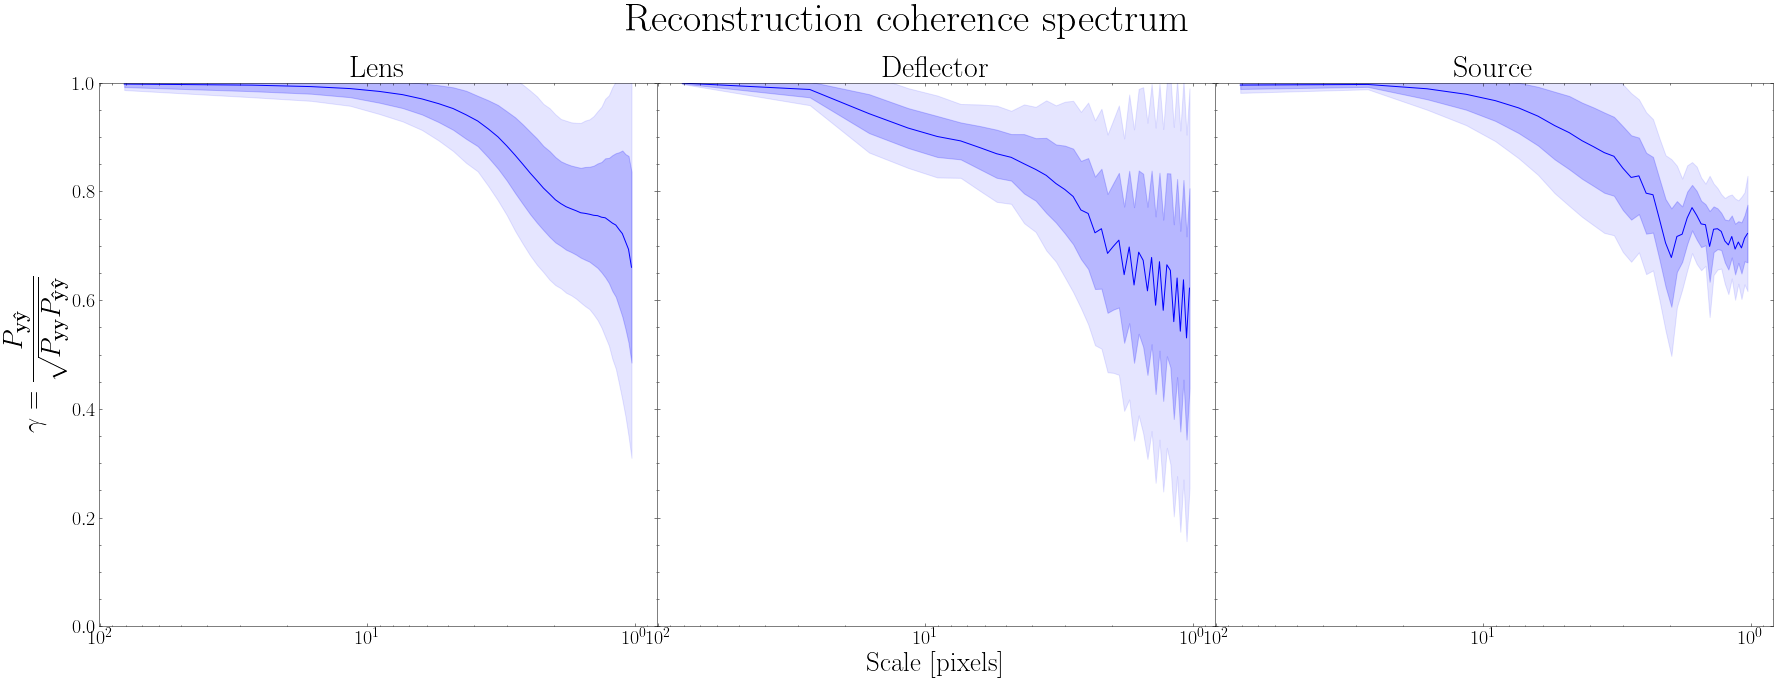

In [139]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
color = "b"
color2 = "r"

# lens
r = np.array(hf[dataset]["lens_coherence_spectrum"])
f = np.array(hf[dataset]["lens_frequencies"])
bins=r.shape[1]

r_mean = r.mean(axis=0)
r_std = r.std(axis=0)
lam = 1/f/2


ax1.plot(lam, r_mean, "-", color=color, label=r"$\bar{\gamma}$")
ax1.fill_between(lam, r_mean - r_std, r_mean + r_std, color=color, alpha=0.2, label=r"$\bar{\gamma} \pm \sigma_\gamma$")
ax1.fill_between(lam, r_mean - 2 * r_std, r_mean + 2 * r_std, color=color, alpha=0.1, label=r"$\bar{\gamma} \pm 2\sigma_\gamma$")

# lens 2
# r = np.array(hf[dataset]["lens_coherence_spectrum2"])
# r_mean = r.mean(axis=0)
# r_std = r.std(axis=0)

# ax1.plot(lam, r_mean, "-", color=color2, label=r"$\bar{\gamma}$")
# ax1.fill_between(lam, r_mean - r_std, r_mean + r_std, color=color2, alpha=0.2, label=r"$\bar{\gamma} \pm \sigma_\gamma$")
# ax1.fill_between(lam, r_mean - 2 * r_std, r_mean + 2 * r_std, color=color2, alpha=0.1, label=r"$\bar{\gamma} \pm 2\sigma_\gamma$")
# ax1.set_xlabel(r"$\dfrac{1}{2}\lambda$ [arcsec]")
ax1.invert_xaxis()
ax1.set_xscale("log")
ax1.set_ylim(0, 1)
# plt.xlim(128, 3)
# ax1.legend(loc="lower left")
ax1.set_ylabel(r"$\gamma = \dfrac{P_{\mathbf{y}\mathbf{\hat{y}}}}{\sqrt{P_{\mathbf{y}\mathbf{y}} P_{\mathbf{\hat{y}}\mathbf{\hat{y}}}}}$")
ax1.set_title("Lens")


# kappa
r = np.array(hf[dataset]["kappa_coherence_spectrum"])
f = np.array(hf[dataset]["kappa_frequencies"])
bins=r.shape[1]

r_mean = r.mean(axis=0)
r_std = r.std(axis=0)
lam = 1/f/2



ax2.plot(lam, r_mean, "-", color=color, label=r"$\bar{\gamma}$")
ax2.fill_between(lam, r_mean - r_std, r_mean + r_std, color=color, alpha=0.2, label=r"$\bar{\gamma} \pm \sigma_\gamma$")
ax2.fill_between(lam, r_mean - 2 * r_std, r_mean + 2 * r_std, color=color, alpha=0.1, label=r"$\bar{\gamma} \pm 2\sigma_\gamma$")
ax2.invert_xaxis()
ax2.set_xscale("log")
ax2.set_ylim(0, 1)
ax2.set_title("Deflector")
# plt.xlim(128, 3)
# ax2.legend(loc="lower left")


# source
r = np.array(hf[dataset]["source_coherence_spectrum"])
f = np.array(hf[dataset]["source_frequencies"])
bins=r.shape[1]

r_mean = r.mean(axis=0)
r_std = r.std(axis=0)
lam = 1/f/2

ax3.plot(lam, r_mean, "-", color=color, label=r"$\bar{\gamma}$")
ax3.fill_between(lam, r_mean - r_std, r_mean + r_std, color=color, alpha=0.2, label=r"$\bar{\gamma} \pm \sigma_\gamma$")
ax3.fill_between(lam, r_mean - 2 * r_std, r_mean + 2 * r_std, color=color, alpha=0.1, label=r"$\bar{\gamma} \pm 2\sigma_\gamma$")

# source 2
# r = np.array(hf[dataset]["source_coherence_spectrum2"])
# r_mean = r.mean(axis=0)
# r_std = r.std(axis=0)

# ax3.plot(lam, r_mean, "-", color=color2, label=r"$\bar{\gamma}$")
# ax3.fill_between(lam, r_mean - r_std, r_mean + r_std, color=color2, alpha=0.2, label=r"$\bar{\gamma} \pm \sigma_\gamma$")
# ax3.fill_between(lam, r_mean - 2 * r_std, r_mean + 2 * r_std, color=color2, alpha=0.1, label=r"$\bar{\gamma} \pm 2\sigma_\gamma$")
ax3.invert_xaxis()
ax3.set_xscale("log")
ax3.set_ylim(0, 1)
ax3.set_title("Source")
# plt.xlim(128, 3)
# ax3.legend(loc="lower left")

fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r"Scale [pixels]")

plt.subplots_adjust(wspace=0, hspace=0);
fig.suptitle("Reconstruction coherence spectrum", y=0.99);


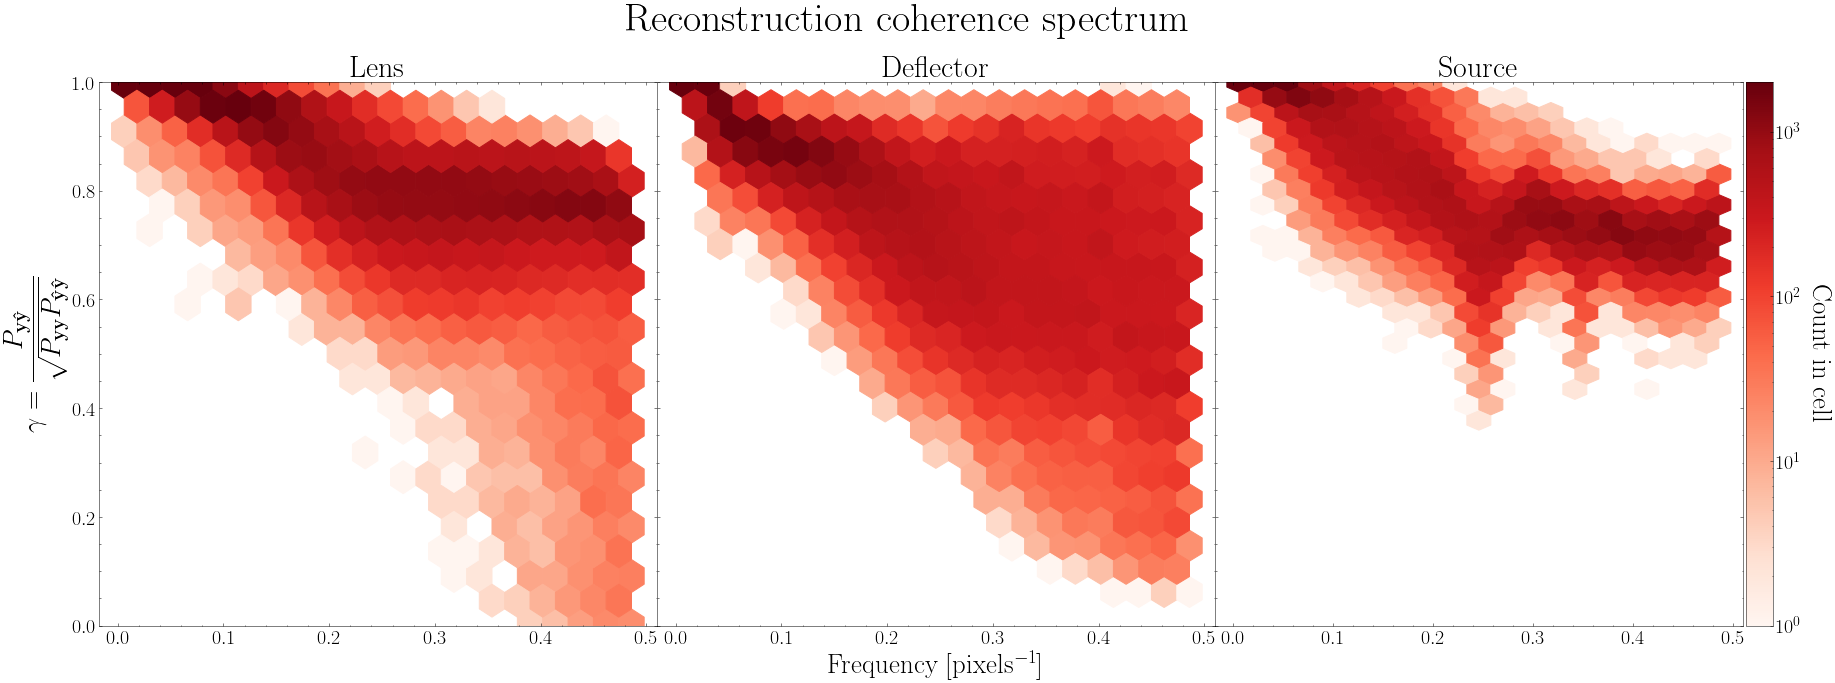

In [173]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(30, 10), sharey=True)
gridsize=20

# lens
r = np.array(hf[dataset]["lens_coherence_spectrum"])
f = np.array(hf[dataset]["lens_frequencies"])
point_cloud = np.stack([np.tile(f, r.shape[0]), r.ravel()], axis=1)
ax1.hexbin(point_cloud[:, 0], point_cloud[:, 1], gridsize=gridsize, cmap='Reds', norm=LogNorm(vmin=1, vmax=2000), mincnt=1)
ax1.set_ylim(0, 1)
# ax1.set_xlim(0, 0.5)
ax1.set_ylabel(r"$\gamma = \dfrac{P_{\mathbf{y}\mathbf{\hat{y}}}}{\sqrt{P_{\mathbf{y}\mathbf{y}} P_{\mathbf{\hat{y}}\mathbf{\hat{y}}}}}$")
ax1.set_title("Lens")


# # kappa
r = np.array(hf[dataset]["kappa_coherence_spectrum"])
f = np.array(hf[dataset]["kappa_frequencies"])
point_cloud = np.stack([np.tile(f, r.shape[0]), r.ravel()], axis=1)
ax2.hexbin(point_cloud[:, 0], point_cloud[:, 1], gridsize=gridsize, cmap='Reds', norm=LogNorm(vmin=1, vmax=2000), mincnt=1)
ax2.set_ylim(0, 1)
# ax2.set_xlim(0, 0.5)
ax2.set_title("Deflector")


# source
r = np.array(hf[dataset]["source_coherence_spectrum"])
f = np.array(hf[dataset]["source_frequencies"])
point_cloud = np.stack([np.tile(f, r.shape[0]), r.ravel()], axis=1)
ax3.hexbin(point_cloud[:, 0], point_cloud[:, 1], gridsize=gridsize, cmap='Reds', norm=LogNorm(vmin=1, vmax=2000), mincnt=1)
ax3.set_ylim(0, 1)
# ax3.set_xlim(0, 0.5)
ax3.set_title("Source")

divider = make_axes_locatable(ax3)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(ScalarMappable(cmap="Reds", norm=LogNorm(vmin=1, vmax=2000)), cax=cax)
cax.set_ylabel("Count in cell", rotation=270, labelpad=30)


fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel(r"Frequency [pixels$^{-1}$]")

plt.subplots_adjust(wspace=0, hspace=0);
fig.suptitle("Reconstruction coherence spectrum", y=0.99);
plt.savefig("RIMSU128hstv4_coherence_spectrum.png")